In [1]:
import pandas as pd

data = pd.read_csv('/Users/lilia/Desktop/21FL/Text Mining/archive/Reviews.csv')

In [2]:
#packages needed

#ignore warnings about future changes in functions as they take too much space
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

#the module 'sys' allows istalling module from inside Jupyter
import sys

!{sys.executable} -m pip install numpy
import numpy as np 

!{sys.executable} -m pip install pandas
import pandas as pd

#Natrual Language ToolKit (NLTK)
!{sys.executable} -m pip install nltk
import nltk

#text normalization function
%run ./Text_Normalization_Function.ipynb

#ignore warnings about future changes in functions as they take too much space
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /Users/lilia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/lilia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lilia/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/lilia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

## Data Cleasing

In [3]:
from datetime import datetime
data["Time"] = data["Time"].map(lambda x : datetime.fromtimestamp(x).year)
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
data_2012 = data.loc[data['Time'] == 2012]


In [5]:
data_2012.shape

(198064, 10)

In [6]:
sample = data_2012.sample(n = 50_000, replace = False, random_state = 1)
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
105948,105949,B0036VE3V2,A19SREUWP7VC98,Carole,0,0,5,2012,Fresh is Best Freeze Dried Chicken Hearts and ...,"Seller's Service was excellent and the ""Fresh ..."
476409,476410,B001ELL44A,A36YVX9UNLWJZC,Warren Sensat,1,1,5,2012,Spelt flour,Came as advertised. We enjoy making and eatin...
401421,401422,B0049EKZ08,AE9XCPOPW9YIT,Frank,0,0,5,2012,Awesome!!!,This stuff is easy to use and makes the meat t...
97954,97955,B001RJ9266,A22H0CDHVYMA7B,CottonBallGirl,0,0,5,2012,Emerald Harmony Original Trail Mix,Emerald Harmony Original Trail Mix is great to...
560285,560286,B002UT92EY,A2DI6BJBHQUEO6,Ron Weible,1,2,1,2012,Blue Buffalo Wilderness Cat Food,I felt that my 13 yr. old Siamese (Lester) wit...


In [7]:
one_score = sample.loc[sample['Score'] == 1]
five_score = sample.loc[sample['Score'] == 5]
one_score['Pos/Neg'] = "negative"
five_score['Pos/Neg'] = "positive"
one_five_sample = pd.concat([one_score,five_score])
one_five_sample.head()

<ipython-input-7-f24acee934bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_score['Pos/Neg'] = "negative"
<ipython-input-7-f24acee934bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_score['Pos/Neg'] = "positive"


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Pos/Neg
560285,560286,B002UT92EY,A2DI6BJBHQUEO6,Ron Weible,1,2,1,2012,Blue Buffalo Wilderness Cat Food,I felt that my 13 yr. old Siamese (Lester) wit...,negative
542903,542904,B0032JCJLE,A21UMFZMY3H73U,Bar,0,0,1,2012,Bar,This item was a dissappointment all around! Ve...,negative
524747,524748,B002DHNIBG,A22AZ4IAJ70E56,bizzween,0,0,1,2012,natural fraud,kashi is an 'all natural' fraud. although som...,negative
281681,281682,B007RTR9DS,A3TSQ61MSDNR9P,Raquiyah Kelly,0,2,1,2012,It has what in it?,Omg! Is anyone reading what's in this crap! Mi...,negative
124918,124919,B005BHIESC,A1ZSE31RSEU9BR,Lora Applegarth,0,1,1,2012,Never again!,"I purchased this thinking ""what a great deal!""...",negative


In [9]:
one_score.shape

(5126, 11)

In [10]:
five_score.shape

(30910, 11)

In [34]:
one_five_sample_reviews = one_five_sample['Text']
len(one_five_sample_reviews)

36036

In [35]:
score = one_five_sample['Pos/Neg']
score_polarity = np.array(score)

In [36]:
train_reviews = data_2012.sample(n = 50_000, replace = False, random_state = 2)
one_score_train = train_reviews.loc[train_reviews['Score'] == 1]
five_score_train = train_reviews.loc[train_reviews['Score'] == 5]
one_score_train['Pos/Neg'] = "negative"
five_score_train['Pos/Neg'] = "positive"
one_five_sample_train = pd.concat([one_score_train,five_score_train])
one_five_sample_train.head()

<ipython-input-36-436b094b65fd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_score_train['Pos/Neg'] = "negative"
<ipython-input-36-436b094b65fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_score_train['Pos/Neg'] = "positive"


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Pos/Neg
245815,245816,B004OAZ36I,A39970YALPNEZ3,Erin Johnson,1,1,1,2012,Didn't even come in a box,I received 4 of these and they were simply an ...,negative
205367,205368,B006Z82F7M,AM0S1OTJ9OOGA,purplrodeo69,0,0,1,2012,Not happy,I was not happy with the product. The product ...,negative
526434,526435,B00375LBNK,A1286MWY9ZAMDN,Ken,0,0,1,2012,Yuk!,Tossed this out after trying it. Texture and ...,negative
191623,191624,B002JIHG1M,A12D1KTEGHPDO2,"Leckie ""Loyal Amazon Shopper""",3,3,1,2012,Made in China,Be aware that these treats are made in China. ...,negative
82827,82828,B005D8TMB2,A2QVGXCTMSVJ6K,Work2Sew,0,0,1,2012,"I'm Glad They Added ""IMITATION"" to the Title","I'm glad that they added ""IMITATION"" to the ti...",negative


In [37]:
one_five_sample_reviews_train = one_five_sample_train['Text']
len(one_five_sample_reviews_train)

36131

In [38]:
score_train = one_five_sample_train['Pos/Neg']
score_polarity_train = np.array(score_train)

## Sentiment Analysis

### Lexicon

In [39]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ellenliu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### Import the sentiment analysis function SentimentIntensityAnalyzer() that uses the VADER lexicon from the NLTK package. Let's refer to that function as analyzer for short: 

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [41]:
normalized_one_five_sample_reviews = normalize_corpus(one_five_sample_reviews)

test

In [26]:
text_1a = 'I liked the plot of this movie'
print(text_1a, "\nScores:", analyzer.polarity_scores(text_1a),"\n")

I liked the plot of this movie 
Scores: {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.4215} 



#### Define the Scoring Function 

In [42]:
def analyze_sentiment_vader_lexicon(one_five_sample_reviews, threshold = 0.1, verbose = False):
    scores = analyzer.polarity_scores(one_five_sample_reviews)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound']  

test

In [17]:
sample_docs = [1,50]
for doc_index in sample_docs:
    print('\nReview text:\n')
    print(normalized_one_five_sample_reviews[doc_index],"\n")
    print('ACTUAL Polarity (Labeled by Human):', score_polarity[doc_index],"\n")    
    final_sentiment = analyze_sentiment_vader_lexicon(normalized_one_five_sample_reviews[doc_index],
                                                        threshold=0.1,
                                                        verbose=True)
    print('-'*60)   


Review text:

item dissappointment around expensive taste awful spongy word good conventional calorie bread item addition taste awful mold quickly despite refrigeration know must freezer happen like frozen bread mold unlike anything ever really gross end toss loaf sans piece gag waste money 

ACTUAL Polarity (Labeled by Human): negative 

VADER Polarity (Binary): negative
VADER Score: -0.85
------------------------------------------------------------

Review text:

order chocolate febuary went buck almost buck ship price cocoa didnot rise much someone must gotten large raise please bring price earth order otherwise forget 

ACTUAL Polarity (Labeled by Human): negative 

VADER Polarity (Binary): positive
VADER Score: 0.1
------------------------------------------------------------


see all reviews

In [43]:
VADER_polarity = [analyze_sentiment_vader_lexicon(review, threshold=0.1) for review in one_five_sample_reviews]
VADER_polarity_df = pd.DataFrame(VADER_polarity, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_df.head(5)

,VADER Polarity,VADER Score
0,positive,0.7684
1,negative,-0.8803
2,negative,-0.1823
3,negative,-0.9250
4,negative,-0.9838


calculate accuracy rate

In [44]:
from sklearn import metrics
print('Accuracy Rate:', np.round(metrics.accuracy_score(score_polarity, 
                                 VADER_polarity_df['VADER Polarity']), 3),"\n")

Accuracy Rate: 0.89 



### Choose the Treshold 

In [20]:
def try_threshold_for_accuracy(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = ['positive' if s >= threshold_for_pos else 'negative' for s in list(sentiment_scores)]
    accuracy = metrics.accuracy_score(score_polarity, VADER_binary_polarity)
    return(accuracy) 

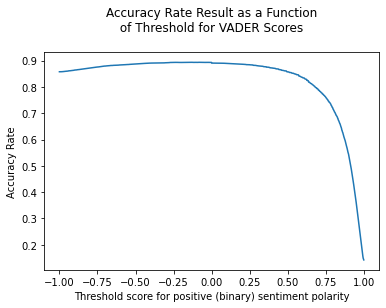

In [22]:
thresholds = np.linspace(-1,1,1000)
acc_rates = [try_threshold_for_accuracy(VADER_polarity_df['VADER Score'],threshold) for threshold in thresholds]

plt.plot(thresholds, acc_rates)
plt.xlabel("Threshold score for positive (binary) sentiment polarity")
plt.ylabel("Accuracy Rate")
plt.title("Accuracy Rate Result as a Function\n of Threshold for VADER Scores \n")
plt.show()

In [23]:
thresholds[acc_rates.index(max(acc_rates))]

-0.07507507507507505

In [24]:
VADER_polarity = [analyze_sentiment_vader_lexicon(review, threshold= -0.075) for review in one_five_sample_reviews]
VADER_polarity_df = pd.DataFrame(VADER_polarity, columns = ['VADER Polarity','VADER Score'])

from sklearn import metrics
print('Accuracy Rate:', np.round(metrics.accuracy_score(score_polarity, 
                                 VADER_polarity_df['VADER Polarity']), 3),"\n")

Accuracy Rate: 0.894 



### SVM 

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer



In [26]:
normalized_one_five_sample_reviews_train = normalize_corpus(one_five_sample_reviews_train)

In [27]:
vectorizer = TfidfVectorizer(ngram_range = (1,2)) 
feature_matrix_TRAIN = vectorizer.fit_transform(normalized_one_five_sample_reviews_train).astype(float)

In [28]:
feature_matrix_TRAIN_names = vectorizer.get_feature_names() 
feature_matrix_TRAIN_table = pd.DataFrame(data = feature_matrix_TRAIN.todense(), 
                                          columns = feature_matrix_TRAIN_names)
feature_matrix_TRAIN_table.head()

,00am,00am stomach,00pm,00pm though,00something,00something dollar,025968680a,07m2402,07m2402 july,07m2402 meaning,...,zuppa,zuppa inglese,zupreem,zupreem ball,zylitol,zylitol dentist,éste,éste producto,étouffé,étouffé lose
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
feature_matrix_TEST = vectorizer.transform(normalized_one_five_sample_reviews)

In [54]:
from sklearn import linear_model

svm = linear_model.SGDClassifier(loss='hinge', random_state = 0) 
svm.fit(feature_matrix_TRAIN, score_polarity_train)
predicted_svm = svm.predict(feature_matrix_TEST)

NameError: name 'feature_matrix_TRAIN' is not defined

In [31]:
print('Accuracy rate:', np.round(metrics.accuracy_score(score_polarity, predicted_svm), 3))

Accuracy rate: 0.932


### Export Data 

In [51]:
one_five_sample['predict'] = predicted_svm
result_one = one_five_sample[one_five_sample['Score'] == 1]
result_one = result_one[result_one['predict'] == "negative"]

result_five = one_five_sample[one_five_sample['Score'] == 5]
result_five = result_five[result_five['predict'] == "positive"]

result_one.to_csv('/Users/lilia/Desktop/21FL/Text Mining/archive/result_one.csv')
result_five.to_csv('/Users/lilia/Desktop/21FL/Text Mining/archive/result_five.csv')



### Data Extraction ver 2 

下面的部分在后续用不到，可以先无视

In [49]:
#sample
#train_reviews

all_sample_reviews = sample['Text']
all_score = sample['Score']
normalized_all_sample_reviews = normalize_corpus(all_sample_reviews)

all_sample_reviews_train = train_reviews['Text']
all_score_train = train_reviews['Score']
normalized_all_sample_reviews_train = normalize_corpus(all_sample_reviews_train)

In [50]:
normalized_all_sample_reviews = normalize_corpus(all_sample_reviews)

### Lexicon ver 2 

In [118]:
VADER_polarity_all = [analyze_sentiment_vader_lexicon(review, threshold=0.1) for review in all_sample_reviews]
VADER_polarity_df_all = pd.DataFrame(VADER_polarity_all, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_df_all.head(5)

,VADER Polarity,VADER Score
0,positive,0.9393
1,positive,0.4939
2,positive,0.6239
3,positive,0.9845
4,positive,0.7684


In [120]:
a=[]
for x in VADER_polarity_df_all['VADER Score']:
    if x<-0.6:
        y=1
    elif -0.2>x>=-0.6:
        y=2
    elif 0.2>x>-0.2:
        y=3
    elif 0.6>x>=0.2:
        y=4
    else:
        y=5
    a.append(y)
m = all_score
n= m.tolist()
acc = 0
for i in range(len(a)):
    if a[i] == n[i]:
        acc = acc + 1

acc / len(a)


0.58412

### SVM ver 2 

In [51]:
vectorizer = TfidfVectorizer(ngram_range = (1,2)) 
feature_matrix_TRAIN_2 = vectorizer.fit_transform(normalized_all_sample_reviews_train).astype(float)
feature_matrix_TRAIN_names_2 = vectorizer.get_feature_names() 
feature_matrix_TRAIN_table_2 = pd.DataFrame(data = feature_matrix_TRAIN_2.todense(), 
                                          columns = feature_matrix_TRAIN_names_2)
feature_matrix_TRAIN_table_2.head()

,000mg,000mg day,000mg taurine,00am,00am stomach,00pm,00pm barely,00pm though,00something,00something dollar,...,zupreem ball,zylitol,zylitol dentist,zylitor,zylitor splenda,zzzzzzz,éste,éste producto,étouffé,étouffé lose
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
feature_matrix_TEST_2 = vectorizer.transform(normalized_all_sample_reviews)

In [62]:
from sklearn import linear_model
svm = linear_model.SGDClassifier(loss='hinge', random_state = 0) 
svm.fit(feature_matrix_TRAIN_2, all_score_train)
predicted_svm = svm.predict(feature_matrix_TEST_2)

In [63]:
total2 = 0
m = all_score
n= m.tolist()  
for i in range (len(predicted_svm)):
    if predicted_svm[i] == n[i]:
        total2 = total2+1;
      
total2/len(predicted_svm)

0.7124